In [62]:
'''
메일 스팸/햄 분류기

Many-to-One

1. 제목 열 추출
2. 공백(nltk, keras ..) / 형태소 분리 (konlpy)
3. 불용어, 조사 등 제거 (정규표현식 사용)
4. 유일한 단어 -> 길이(코퍼스 크기)
5. 각 단어 숫자 부여
6. 가장 긴 문장 길이 조사 (maxlen=30)
7. 모든 문장 길이 동일하게 (pre, post)
-> 전처리 과정 data 준비

1. timestep
2. word_dim
3. batch_size
4. LSTM cell 출력차원
-> LSTM, RNN 기반 설계 진행시 항상 고민

입력과 셀 사이에 임베딩 층 (차원 축소 역할)
'''

'\n메일 스팸/햄 분류기\n\nMany-to-One\n\n1. 제목 열 추출\n2. 공백(nltk, keras ..) / 형태소 분리 (konlpy)\n3. 불용어, 조사 등 제거 (정규표현식 사용)\n4. 유일한 단어 -> 길이(코퍼스 크기)\n5. 각 단어 숫자 부여\n6. 가장 긴 문장 길이 조사 (maxlen=30)\n7. 모든 문장 길이 동일하게 (pre, post)\n-> 전처리 과정 data 준비\n\n1. timestep\n2. word_dim\n3. batch_size\n4. LSTM cell 출력차원\n-> LSTM, RNN 기반 설계 진행시 항상 고민\n\n입력과 셀 사이에 임베딩 층 (차원 축소 역할)\n'

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [66]:
X_train.shape #8982개의 뉴스기사

(8982,)

In [67]:
X_train[0] #첫번째 뉴스기사, 숫자로 인코딩

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [68]:
y_train #뉴스기사 카테고리

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [69]:
np.max(y_train) # 뉴스 기사 종류가 46개

45

In [70]:
np.min(y_train) # 뉴스 기사 종류가 46개

0

In [71]:
#모든 문장의 최대 길이를 100으로 정함
#y_train 원핫인코딩

In [72]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test =  sequence.pad_sequences(X_test, maxlen=100)

In [73]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
model = Sequential()

In [75]:
model.add(Embedding(1000, 100))

In [76]:
model.add(LSTM(100))

In [77]:
model.add(Dense(46, activation='softmax'))

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [80]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.1621 - accuracy: 0.4521 - val_loss: 1.8632 - val_accuracy: 0.5058
Epoch 2/200
263/450 [================>.............] - ETA: 7s - loss: 1.8081 - accuracy: 0.5240

KeyboardInterrupt: 

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
#history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])
#X_train, y_train 데이터에 대해 20%를 검증(validation)용으로 사용

In [103]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv("tsla.us.txt")

In [105]:
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [106]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [107]:
data.shape

(1858, 7)

In [108]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [109]:
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [110]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [111]:
train, test = data[0:training_size],data[training_size:data_len]

In [112]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [113]:
train = train.loc[:, ["Open"]].values

In [114]:
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # 0~1 사이로 스케일링
train_scaled = scaler.fit_transform(train)

In [116]:
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [117]:
end_len = len(train_scaled)
end_len

1486

In [118]:
X_train = []
y_train = []
timesteps = 40

In [119]:
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i,0])

In [120]:
train_scaled[0:40,0] #40일간의 시가

array([0.00316724, 0.01053291, 0.03553935, 0.03262991, 0.02526424,
       0.01421574, 0.00095754, 0.        , 0.00530328, 0.00666593,
       0.00460354, 0.0066291 , 0.01399477, 0.01679372, 0.01926122,
       0.02102898, 0.01664641, 0.01605716, 0.01859831, 0.01973999,
       0.01756712, 0.0162413 , 0.01705152, 0.01495231, 0.01605716,
       0.01789857, 0.02139727, 0.01988731, 0.01458402, 0.01384746,
       0.01292675, 0.00939123, 0.0061135 , 0.00751298, 0.00850735,
       0.01038559, 0.01270578, 0.0088388 , 0.00924391, 0.01086436])

In [99]:
train_scaled[40,0] #40+1번째의 

0.01145361470187456

In [121]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [122]:
X_train.shape

(1446, 40)

In [123]:
y_train.shape

(1446,)

In [ ]:
# RNN : 입력 데이터의 구조를 3차원으로 해야함

In [126]:
X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [128]:
X_train.shape
#(데이터 갯수, timestep, dimension)

(1446, 40, 1)

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [130]:
regressor = Sequential()

In [131]:
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [132]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [133]:
epochs = 100 
batch_size = 20

In [134]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 3s 14ms/step - loss: 0.2771
Epoch 2/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1452
Epoch 3/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0763
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0626
Epoch 5/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0450
Epoch 6/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0339
Epoch 7/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0293
Epoch 8/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0228
Epoch 9/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0200
Epoch 10/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0184
Epoch 11/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0170
Epoch 12/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0154
Epoch 13/100
73/73 [=====

In [135]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [136]:
real_price = test.loc[:, ["Open"]].values

In [159]:
dataset_total = pd.concat((data['Open'], test['Open']), axis=-0)

In [166]:
dataset_total[1818:].shape

(412,)

In [161]:
inputs = dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1) #2230 - 372 - 40 = 1818
inputs.shape

(412, 1)

In [142]:
inputs = scaler.transform(inputs)
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [144]:
X_test=[]
for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])

In [145]:
X_test = np.array(X_test)

In [146]:
print(X_test.shape)

(372, 40)


In [147]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [148]:
pred = regressor.predict(X_test)

12/12 [==============================] - 0s 5ms/step


In [149]:
pred

array([[1.0408931 ],
       [0.955142  ],
       [0.8811228 ],
       [0.8616562 ],
       [0.8822936 ],
       [0.88964427],
       [0.8799622 ],
       [0.86499304],
       [0.8523106 ],
       [0.8421041 ],
       [0.84436566],
       [0.8616645 ],
       [0.8790499 ],
       [0.87847936],
       [0.8573041 ],
       [0.8369857 ],
       [0.8324954 ],
       [0.8370975 ],
       [0.8376272 ],
       [0.83553815],
       [0.8384013 ],
       [0.80918175],
       [0.77673995],
       [0.74650526],
       [0.7300017 ],
       [0.7490617 ],
       [0.77276266],
       [0.79413915],
       [0.7888464 ],
       [0.78498185],
       [0.7853597 ],
       [0.7939125 ],
       [0.81228006],
       [0.8276484 ],
       [0.84125745],
       [0.8475195 ],
       [0.84732586],
       [0.84665096],
       [0.8440092 ],
       [0.8517114 ],
       [0.8617022 ],
       [0.8651577 ],
       [0.85914826],
       [0.8542665 ],
       [0.8607803 ],
       [0.87102795],
       [0.8738942 ],
       [0.876

In [151]:
pred.shape

(372, 1)

In [152]:
pred = scaler.inverse_transform(pred)
pred

array([[298.7737 ],
       [275.48972],
       [255.39128],
       [250.10551],
       [255.70918],
       [257.7051 ],
       [255.07614],
       [251.01157],
       [247.5679 ],
       [244.79652],
       [245.41061],
       [250.10776],
       [254.82843],
       [254.67351],
       [248.92378],
       [243.40674],
       [242.18748],
       [243.4371 ],
       [243.58092],
       [243.01369],
       [243.79112],
       [235.85713],
       [227.0482 ],
       [218.83858],
       [214.35736],
       [219.53273],
       [225.96825],
       [231.77261],
       [230.33546],
       [229.28613],
       [229.38872],
       [231.71106],
       [236.69841],
       [240.87138],
       [244.56665],
       [246.26698],
       [246.2144 ],
       [246.03114],
       [245.31383],
       [247.4052 ],
       [250.11801],
       [251.05629],
       [249.42453],
       [248.099  ],
       [249.86768],
       [252.65022],
       [253.4285 ],
       [254.17169],
       [256.4559 ],
       [256.20526],


In [154]:
real_price.shape

(372, 1)

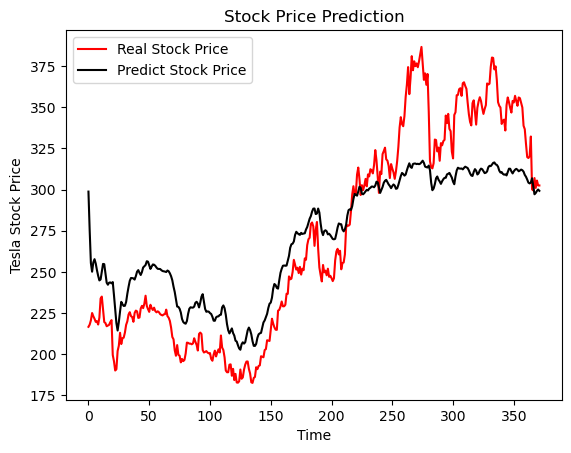

In [155]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [167]:
#1. LSTM 변경하고 RNN과 비교
#2. 관심있는 회사에 대해 예측모델

In [168]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
data = pd.read_csv("tsla.us.txt")

In [170]:
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [171]:
from sklearn.preprocessing import MinMaxScaler